# Microbiome metabolome integrations, storage prediction exclusively based on FIA data.

In [1]:
import pandas as pd
import os

import tkinter as tk

In [3]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

In [4]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


In [5]:
# Read the CSV file into a DataFrame
meta = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)
meta

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_217-LP4-16S-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.107406,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341
366294_255-LP4-16S-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.064754,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.071042,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511
366294_223-LP4-16S-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.047115,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725
366294_177-LP4-16S-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.056046,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_239-LP4-16S-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.015633,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157
366294_173-LP4-16S-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.064827,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.110319,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN


In [6]:
# Read the CSV file into a DataFrame
fia = pd.read_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time.csv', index_col=0)
fia

#drop the day column:
fia = fia.drop(columns=['day'])
fia

,M101.1397,M101.4016,M101.216,M101.1307,M101.361,M1065.3544,M101.1641,M1011.9742,M101.2658,M101.1717,...,M491.0823,M427.124,M471.0758,M387.0952,M529.1587,M566.1577,M280.9969,M602.3878,M650.4282,M627.4082
366294_209-LP4-16S-0709,-1.719186,-0.005587,-0.819224,-0.643476,-0.563613,-1.238194,-1.291117,-0.787095,0.305993,-0.450656,...,3.018922,1.527472,3.356134,-1.970182,0.584555,0.165857,-1.301796,-2.339606,-1.117462,-1.569455
366294_255-LP4-16S-0755,0.969663,0.827103,0.012722,0.232361,1.075316,-1.238194,-2.334210,-0.787095,0.337479,0.346945,...,1.025416,0.876762,1.877329,-1.970182,0.474384,1.443227,2.899690,0.977308,-0.782123,0.834207
366294_237-LP4-16S-0737,-0.040148,0.365908,0.412915,0.574030,0.755889,-0.574047,-0.002002,-0.272348,0.103163,-0.158779,...,0.404663,0.039166,0.328660,0.700266,0.030222,0.444627,0.534985,-1.299923,-0.235451,0.077561
366294_198-LP4-16S-0698,0.223004,0.045623,-0.489110,0.262813,0.333016,-1.238194,0.061060,-0.787095,0.454082,-0.190043,...,0.344534,-0.003581,0.740635,0.211338,0.274479,0.393849,1.211015,0.017851,-0.525899,0.499540
366294_240-LP4-16S-0740,0.257549,-0.450437,-1.090411,-0.259338,-0.072065,-1.238194,0.019162,-0.787095,0.853841,-0.569116,...,-0.597017,-0.476023,-0.522776,-0.116855,-0.245493,-1.022309,-0.741305,-5.158020,-4.065674,-1.536419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.237773,-0.271866,-0.551991,0.503614,-0.632575,0.497751,-0.421483,0.945071,-0.377953,0.087338,...,-0.597017,-0.623359,-0.522776,-0.257413,-0.658578,-1.022309,-0.263968,0.412403,-0.090861,-0.315696
366294_196-LP4-16S-0696,1.452594,-0.459263,0.161369,-1.966211,-0.084196,1.850121,0.228634,2.172716,2.074634,-0.095193,...,-0.597017,-0.496762,-0.522776,0.039975,-0.367459,-1.022309,-0.022890,0.851905,-0.553311,-0.217145
366294_245-LP4-16S-0745,0.067279,-1.707152,-2.218086,0.064743,-1.419582,0.439492,-0.913948,1.140248,-2.311587,-1.075902,...,-0.597017,-1.053244,-0.522776,-0.440953,-0.658578,-1.022309,-0.228455,-0.098037,-0.515056,-0.740828
366294_252-LP4-16S-0752,-0.096739,0.070386,-2.218086,0.683783,-0.626762,1.525348,-2.334210,2.101096,-0.142849,-2.221342,...,-0.597017,-0.464962,-0.522776,-0.279029,-0.658578,-1.022309,-1.563645,1.223119,1.165633,0.181113


In [7]:
#also imort the tss normalized fia data:
tss_fia = pd.read_csv('FIA/20250516_fia_feature_table_tss.csv', index_col=0)

#then filter to only contain the columns present in the fia df:
tss_fia = tss_fia[fia.columns]
tss_fia

,M101.1397,M101.4016,M101.216,M101.1307,M101.361,M1065.3544,M101.1641,M1011.9742,M101.2658,M101.1717,...,M491.0823,M427.124,M471.0758,M387.0952,M529.1587,M566.1577,M280.9969,M602.3878,M650.4282,M627.4082
366294_209-LP4-16S-0709,0.000000,0.000694,0.000604,0.000491,0.000796,0.000000,0.000434,0.000000,0.001280,0.000710,...,0.003691,0.003304,0.004576,0.000000,0.001537,0.000740,0.001416,0.000423,0.001152,0.000883
366294_255-LP4-16S-0755,0.000836,0.000780,0.000727,0.000616,0.000977,0.000000,0.000000,0.000000,0.000979,0.000777,...,0.001251,0.001866,0.002138,0.000000,0.001058,0.001160,0.002504,0.000696,0.000901,0.000958
366294_237-LP4-16S-0737,0.000713,0.000872,0.001173,0.000973,0.001236,0.000451,0.001002,0.000379,0.001219,0.000853,...,0.001055,0.001444,0.001037,0.002185,0.000879,0.000944,0.002319,0.000598,0.001301,0.001184
366294_198-LP4-16S-0698,0.000868,0.000776,0.000811,0.000899,0.001161,0.000000,0.001083,0.000000,0.001469,0.000884,...,0.001044,0.001459,0.001619,0.001878,0.001253,0.000958,0.002771,0.000844,0.001330,0.001319
366294_240-LP4-16S-0740,0.001283,0.000808,0.000768,0.000999,0.001492,0.000000,0.001546,0.000000,0.002442,0.001044,...,0.000000,0.001166,0.000000,0.002317,0.000806,0.000000,0.002634,0.000000,0.001246,0.001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.000396,0.000288,0.000354,0.000451,0.000381,0.000562,0.000392,0.000608,0.000465,0.000455,...,0.000000,0.000271,0.000000,0.000668,0.000000,0.000000,0.000927,0.000412,0.000629,0.000533
366294_196-LP4-16S-0696,0.000433,0.000169,0.000341,0.000000,0.000312,0.000674,0.000354,0.000701,0.000712,0.000283,...,0.000000,0.000236,0.000000,0.000529,0.000119,0.000000,0.000661,0.000299,0.000405,0.000365
366294_245-LP4-16S-0745,0.000344,0.000000,0.000000,0.000353,0.000251,0.000516,0.000277,0.000644,0.000000,0.000215,...,0.000000,0.000000,0.000000,0.000567,0.000000,0.000000,0.000889,0.000355,0.000574,0.000475
366294_252-LP4-16S-0752,0.000148,0.000160,0.000000,0.000218,0.000172,0.000403,0.000000,0.000457,0.000235,0.000000,...,0.000000,0.000167,0.000000,0.000297,0.000000,0.000000,0.000287,0.000212,0.000317,0.000258


In [8]:
bact = pd.read_csv('16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_relative_features_OTU_species_names.csv', index_col=0)
bact

,Acetobacter cerevisiae,Lactobacillus sanfranciscensis,Pediococcus parvulus,Lactobacillus rossiae,Lactobacillus brevis
366294_118-LP4-16S-0618,0.028947,0.836842,0.010526,0.097368,0.026316
366294_124-LP4-16S-0624,0.436842,0.423684,0.000000,0.094737,0.044737
366294_128-LP4-16S-0628,0.645503,0.116402,0.026455,0.100529,0.111111
366294_130-LP4-16S-0630,0.347368,0.513158,0.013158,0.076316,0.050000
366294_132-LP4-16S-0632,0.021053,0.789474,0.013158,0.147368,0.028947
...,...,...,...,...,...
366294_263-LP4-16S-0763,0.023684,0.613158,0.002632,0.315789,0.044737
366294_264-LP4-16S-0764,0.010526,0.892105,0.005263,0.081579,0.010526
366294_265-LP4-16S-0765,0.021164,0.539683,0.044974,0.328042,0.066138
366294_266-LP4-16S-0766,0.013158,0.452632,0.065789,0.386842,0.081579


In [9]:
fungi = pd.read_csv('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/20250511_relative_features_OTU_species_names_combined.csv', index_col=0)
fungi

,Alternaria rosae,Alternaria sp.,Aspergillus ruber,Aureobasidium pullulans,Bensingtonia sp.,Bipolaris yamadae,Cladosporium herbarum,Cystofilobasidium macerans,Dioszegia fristingensis,Dioszegia hungarica,...,Pleosporaceae sp.,Pyrenophora dictyoides,Pyrenophora tritici-repentis,Pyrenophora variabilis,Saccharomyces cerevisiae,Sporobolomyces roseus,Sporobolomyces ruberrimus,Stemphylium vesicarium,Udeniomyces pyricola,Vishniacozyma victoriae
366292_118-LP4-ITS-0618,0.000858,0.006289,0.000286,0.002001,0.000000,0.000000,0.001144,0.000286,0.000000,0.000000,...,0.001429,0.000000,0.000000,0.000000,0.985992,0.000000,0.000000,0.000858,0.000000,0.000000
366292_124-LP4-ITS-0624,0.001144,0.005432,0.000000,0.001144,0.000000,0.000000,0.001144,0.000000,0.000000,0.000000,...,0.006289,0.000000,0.001144,0.000000,0.982847,0.000000,0.000000,0.000286,0.000000,0.000000
366292_128-LP4-ITS-0628,0.000572,0.005149,0.000000,0.001430,0.000000,0.000000,0.000572,0.000000,0.000286,0.000000,...,0.000858,0.000000,0.000000,0.001144,0.988558,0.000000,0.000000,0.000286,0.000286,0.000000
366292_130-LP4-ITS-0630,0.001144,0.006289,0.000000,0.000572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006861,0.000000,0.000286,0.000000,0.983705,0.000000,0.000000,0.000286,0.000000,0.000000
366292_132-LP4-ITS-0632,0.001145,0.020905,0.000286,0.003150,0.000000,0.000000,0.002291,0.000573,0.000000,0.000000,...,0.011741,0.000000,0.003436,0.000286,0.952749,0.000000,0.000000,0.001718,0.000286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366292_263-LP4-ITS-0763,0.002292,0.009453,0.000000,0.003151,0.000000,0.000000,0.003724,0.000000,0.000573,0.000000,...,0.004297,0.000000,0.001146,0.000573,0.971928,0.000000,0.000000,0.000573,0.000286,0.000000
366292_264-LP4-ITS-0764,0.003723,0.015464,0.000286,0.006873,0.000573,0.000000,0.004868,0.000000,0.000286,0.001718,...,0.006300,0.000286,0.002005,0.001432,0.947308,0.001432,0.000573,0.000859,0.000286,0.000286
366292_265-LP4-ITS-0765,0.003731,0.016648,0.001435,0.006315,0.000000,0.000000,0.004305,0.000000,0.000574,0.000000,...,0.002870,0.000000,0.001722,0.001435,0.955798,0.000287,0.000287,0.000574,0.000574,0.000287
366292_266-LP4-ITS-0766,0.003730,0.017504,0.000000,0.004591,0.000287,0.000000,0.005739,0.000000,0.000287,0.000000,...,0.004591,0.000287,0.001722,0.001435,0.952941,0.000574,0.000287,0.000861,0.000287,0.000000


In [10]:
meta

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_217-LP4-16S-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.107406,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341
366294_255-LP4-16S-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.064754,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.071042,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511
366294_223-LP4-16S-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.047115,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725
366294_177-LP4-16S-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.056046,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_239-LP4-16S-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.015633,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157
366294_173-LP4-16S-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.064827,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.110319,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN


In [11]:
#change the index of the meta to be the column 'Unnamed: 0' which is the sample id:
meta_x = meta.copy()
meta_x['16S_id'] = meta_x.index  # Save current index
meta_x.index = meta_x['Unnamed: 0']  # Set new index
meta_x



,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA,16S_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
366292_217-LP4-ITS-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341,366294_217-LP4-16S-0717
366292_255-LP4-ITS-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246,366294_255-LP4-16S-0755
366292_251-LP4-ITS-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511,366294_251-LP4-16S-0751
366292_223-LP4-ITS-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725,366294_223-LP4-16S-0723
366292_177-LP4-ITS-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708,366294_177-LP4-16S-0677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366292_239-LP4-ITS-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157,366294_239-LP4-16S-0739
366292_173-LP4-ITS-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786,366294_173-LP4-16S-0673
366292_121-LP4-ITS-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN,366294_121-LP4-16S-0621


In [12]:
#merge the column '16S_id' from meta_x to fungi
fungi = fungi.merge(meta_x[['16S_id']], left_index=True, right_index=True, how='left')
fungi

#now make the index of fungi the column '16S_id'
fungi.set_index('16S_id', inplace=True)
fungi

,Alternaria rosae,Alternaria sp.,Aspergillus ruber,Aureobasidium pullulans,Bensingtonia sp.,Bipolaris yamadae,Cladosporium herbarum,Cystofilobasidium macerans,Dioszegia fristingensis,Dioszegia hungarica,...,Pleosporaceae sp.,Pyrenophora dictyoides,Pyrenophora tritici-repentis,Pyrenophora variabilis,Saccharomyces cerevisiae,Sporobolomyces roseus,Sporobolomyces ruberrimus,Stemphylium vesicarium,Udeniomyces pyricola,Vishniacozyma victoriae
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_118-LP4-16S-0618,0.000858,0.006289,0.000286,0.002001,0.000000,0.000000,0.001144,0.000286,0.000000,0.000000,...,0.001429,0.000000,0.000000,0.000000,0.985992,0.000000,0.000000,0.000858,0.000000,0.000000
366294_124-LP4-16S-0624,0.001144,0.005432,0.000000,0.001144,0.000000,0.000000,0.001144,0.000000,0.000000,0.000000,...,0.006289,0.000000,0.001144,0.000000,0.982847,0.000000,0.000000,0.000286,0.000000,0.000000
366294_128-LP4-16S-0628,0.000572,0.005149,0.000000,0.001430,0.000000,0.000000,0.000572,0.000000,0.000286,0.000000,...,0.000858,0.000000,0.000000,0.001144,0.988558,0.000000,0.000000,0.000286,0.000286,0.000000
366294_130-LP4-16S-0630,0.001144,0.006289,0.000000,0.000572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006861,0.000000,0.000286,0.000000,0.983705,0.000000,0.000000,0.000286,0.000000,0.000000
366294_132-LP4-16S-0632,0.001145,0.020905,0.000286,0.003150,0.000000,0.000000,0.002291,0.000573,0.000000,0.000000,...,0.011741,0.000000,0.003436,0.000286,0.952749,0.000000,0.000000,0.001718,0.000286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_263-LP4-16S-0763,0.002292,0.009453,0.000000,0.003151,0.000000,0.000000,0.003724,0.000000,0.000573,0.000000,...,0.004297,0.000000,0.001146,0.000573,0.971928,0.000000,0.000000,0.000573,0.000286,0.000000
366294_264-LP4-16S-0764,0.003723,0.015464,0.000286,0.006873,0.000573,0.000000,0.004868,0.000000,0.000286,0.001718,...,0.006300,0.000286,0.002005,0.001432,0.947308,0.001432,0.000573,0.000859,0.000286,0.000286
366294_265-LP4-16S-0765,0.003731,0.016648,0.001435,0.006315,0.000000,0.000000,0.004305,0.000000,0.000574,0.000000,...,0.002870,0.000000,0.001722,0.001435,0.955798,0.000287,0.000287,0.000574,0.000574,0.000287


## sPLS-DA (kind of, but in python;))

Identify sparse, discriminative features from both omics layers.
Reveal co-expressed microbial–metabolite signatures predictive of:
Temperature (e.g., 4°C, 17°C, 30°C)
Storage phase (e.g., early vs mid vs late)
Visualize group separation and interpret biomarker loading vectors.

In [13]:
tss_fia

,M101.1397,M101.4016,M101.216,M101.1307,M101.361,M1065.3544,M101.1641,M1011.9742,M101.2658,M101.1717,...,M491.0823,M427.124,M471.0758,M387.0952,M529.1587,M566.1577,M280.9969,M602.3878,M650.4282,M627.4082
366294_209-LP4-16S-0709,0.000000,0.000694,0.000604,0.000491,0.000796,0.000000,0.000434,0.000000,0.001280,0.000710,...,0.003691,0.003304,0.004576,0.000000,0.001537,0.000740,0.001416,0.000423,0.001152,0.000883
366294_255-LP4-16S-0755,0.000836,0.000780,0.000727,0.000616,0.000977,0.000000,0.000000,0.000000,0.000979,0.000777,...,0.001251,0.001866,0.002138,0.000000,0.001058,0.001160,0.002504,0.000696,0.000901,0.000958
366294_237-LP4-16S-0737,0.000713,0.000872,0.001173,0.000973,0.001236,0.000451,0.001002,0.000379,0.001219,0.000853,...,0.001055,0.001444,0.001037,0.002185,0.000879,0.000944,0.002319,0.000598,0.001301,0.001184
366294_198-LP4-16S-0698,0.000868,0.000776,0.000811,0.000899,0.001161,0.000000,0.001083,0.000000,0.001469,0.000884,...,0.001044,0.001459,0.001619,0.001878,0.001253,0.000958,0.002771,0.000844,0.001330,0.001319
366294_240-LP4-16S-0740,0.001283,0.000808,0.000768,0.000999,0.001492,0.000000,0.001546,0.000000,0.002442,0.001044,...,0.000000,0.001166,0.000000,0.002317,0.000806,0.000000,0.002634,0.000000,0.001246,0.001401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_231-LP4-16S-0731,0.000396,0.000288,0.000354,0.000451,0.000381,0.000562,0.000392,0.000608,0.000465,0.000455,...,0.000000,0.000271,0.000000,0.000668,0.000000,0.000000,0.000927,0.000412,0.000629,0.000533
366294_196-LP4-16S-0696,0.000433,0.000169,0.000341,0.000000,0.000312,0.000674,0.000354,0.000701,0.000712,0.000283,...,0.000000,0.000236,0.000000,0.000529,0.000119,0.000000,0.000661,0.000299,0.000405,0.000365
366294_245-LP4-16S-0745,0.000344,0.000000,0.000000,0.000353,0.000251,0.000516,0.000277,0.000644,0.000000,0.000215,...,0.000000,0.000000,0.000000,0.000567,0.000000,0.000000,0.000889,0.000355,0.000574,0.000475
366294_252-LP4-16S-0752,0.000148,0.000160,0.000000,0.000218,0.000172,0.000403,0.000000,0.000457,0.000235,0.000000,...,0.000000,0.000167,0.000000,0.000297,0.000000,0.000000,0.000287,0.000212,0.000317,0.000258


In [14]:
# Step 1: Find common sample IDs
meta = meta[meta['day'] != 0]
shared_samples = tss_fia.index.intersection(meta.index)

# Step 2: Subset and sort
# bact_aligned = bact.loc[shared_samples].sort_index()
fia_aligned = tss_fia.loc[shared_samples].sort_index()
meta_aligned = meta.loc[shared_samples].sort_index()
# fungi_aligned = fungi.loc[shared_samples].sort_index()
#to bact_aligned, merge more columns from meta_aligned:
# bact_aligned_m = pd.merge(bact_aligned, meta_aligned[
#     ['pH',
#  'TTA',
#  'LAB CFUs',
#  'yeast CFUs',
#  'mannitol',
#  'glucose',
#  'fructose',
#  'sucrose',
#  'maltose',
#  'succinic acid',
#  'lactic acid',
#  'acetic acid',
#  'ethanol',
#  'DNA yield'
#  ]], left_index=True, right_index=True)


In [15]:
meta_aligned['temperature'].unique()

array([30, 17,  4])

In [16]:
# #to bact_aligned, merge more columns from meta_aligned:
# bact_aligned_m = pd.merge(bact_aligned, meta_aligned[
#     ['pH',
#  'TTA',
#  'LAB CFUs',
#  'yeast CFUs',
#  'mannitol',
#  'glucose',
#  'fructose',
#  'sucrose',
#  'maltose',
#  'succinic acid',
#  'lactic acid',
#  'acetic acid',
#  'ethanol',
#  'DNA yield'
#  ]], left_index=True, right_index=True)

In [16]:
#create a palette with grey scale colors form white to black:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_grey", ["white", "black"], N=256)

## adapt to nested CV:

preprocess the data:

In [17]:
meta

,Unnamed: 0,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS,Observed features FIA,Chao1 FIA,Shannon FIA,Simpson FIA,Evenness FIA
16S_id,,,,,,,,,,,,,,,,,,,,,
366294_217-LP4-16S-0717,366292_217-LP4-ITS-0717,1204.0,5.000000,8.00,588.000000,3.0,3.0,W04.02.01,E,6,...,0.107406,0.058532,8.480431,0.828683,0.996810,600.0,600.0,7.659309,0.982243,1.197341
366294_255-LP4-16S-0755,366292_255-LP4-ITS-0755,2285.0,15.000000,17.00,708.000000,5.0,5.0,W04.01.01,C,11,...,0.064754,0.053929,8.378933,0.750937,0.996693,471.0,471.0,7.455047,0.982054,1.211246
366294_251-LP4-16S-0751,366292_251-LP4-ITS-0751,3265.0,16.250000,34.00,708.000000,5.0,8.0,W04.03.01,G,10,...,0.071042,0.057944,8.393120,0.719028,0.996696,437.0,437.0,7.420627,0.981258,1.220511
366294_223-LP4-16S-0723,366292_223-LP4-ITS-0723,1953.0,11.333333,11.00,678.000000,3.0,5.0,W04.03.02,C,7,...,0.047115,0.032811,8.303357,0.759582,0.996632,702.0,702.0,7.751500,0.981927,1.182725
366294_177-LP4-16S-0677,366292_177-LP4-ITS-0677,1960.0,17.333333,19.00,473.004386,4.5,2.0,W04.02.02,E,1,...,0.056046,0.043449,8.305815,0.759449,0.996637,566.0,566.0,7.648832,0.980807,1.206708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_239-LP4-16S-0739,366292_239-LP4-ITS-0739,1536.0,5.000000,8.20,708.000000,5.0,5.0,W30.01.21,C,9,...,0.015633,0.006276,8.216056,0.776201,0.996566,958.0,958.0,9.007755,0.994265,1.312157
366294_173-LP4-16S-0673,366292_173-LP4-ITS-0673,2477.0,18.500000,18.75,718.000000,5.0,6.0,W30.02.21,A,1,...,0.064827,0.053488,8.357678,0.741298,0.996672,984.0,984.0,9.074795,0.994835,1.316786
366294_121-LP4-16S-0621,366292_121-LP4-ITS-0621,1052.0,4.000000,6.00,244.000000,1.0,1.0,W30.02.28,E,6,...,0.110319,0.056100,8.340575,0.830824,0.996682,NaN,NaN,NaN,NaN,NaN


In [18]:
# Step 1: Find common sample IDs
meta = meta[meta['day'] != 0]
shared_samples = tss_fia.index.intersection(meta.index)

# Step 2: Subset and sort
# bact_aligned = bact.loc[shared_samples].sort_index()
fia_aligned = tss_fia.loc[shared_samples].sort_index()
meta_aligned = meta.loc[shared_samples].sort_index()
# fungi_aligned = fungi.loc[shared_samples].sort_index()

In [19]:
fia_aligned

,M101.1397,M101.4016,M101.216,M101.1307,M101.361,M1065.3544,M101.1641,M1011.9742,M101.2658,M101.1717,...,M491.0823,M427.124,M471.0758,M387.0952,M529.1587,M566.1577,M280.9969,M602.3878,M650.4282,M627.4082
366294_173-LP4-16S-0673,0.000140,0.000160,0.000149,0.000000,0.000135,0.000342,0.000153,0.000544,0.000125,0.000000,...,0.000000,0.000149,0.000000,0.000274,0.000112,0.000000,0.000280,0.000188,0.000312,0.000221
366294_174-LP4-16S-0674,0.000853,0.000670,0.000973,0.000625,0.000848,0.000588,0.001052,0.000000,0.001028,0.000685,...,0.000282,0.000622,0.000000,0.001757,0.000685,0.000612,0.001666,0.000588,0.000827,0.000765
366294_175-LP4-16S-0675,0.000000,0.000692,0.000654,0.000645,0.000835,0.000581,0.000916,0.000000,0.000695,0.000549,...,0.000000,0.001112,0.000000,0.001259,0.000734,0.001047,0.001679,0.000534,0.000794,0.000716
366294_176-LP4-16S-0676,0.000264,0.000000,0.000279,0.000285,0.000299,0.000000,0.000210,0.000730,0.000456,0.000276,...,0.000000,0.000000,0.000000,0.000705,0.000000,0.000000,0.000824,0.000484,0.000732,0.000575
366294_177-LP4-16S-0677,0.000573,0.000473,0.001423,0.000627,0.001009,0.000000,0.000879,0.000000,0.001132,0.000860,...,0.001008,0.001325,0.001238,0.001421,0.000917,0.001124,0.001823,0.000668,0.000932,0.000836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_263-LP4-16S-0763,0.000500,0.000000,0.000754,0.000500,0.000574,0.000551,0.000669,0.000374,0.000930,0.000000,...,0.000240,0.000634,0.000201,0.001039,0.000248,0.000262,0.000827,0.000356,0.000576,0.000507
366294_264-LP4-16S-0764,0.000836,0.000817,0.002016,0.000966,0.001106,0.000000,0.001325,0.000000,0.001723,0.001763,...,0.000668,0.001480,0.000680,0.000000,0.000798,0.000641,0.002720,0.000887,0.001664,0.001190
366294_265-LP4-16S-0765,0.000520,0.000000,0.000617,0.000354,0.000477,0.000421,0.000645,0.000609,0.000867,0.000645,...,0.000000,0.000406,0.000000,0.001110,0.000000,0.000000,0.001147,0.000548,0.001005,0.000902
366294_266-LP4-16S-0766,0.000000,0.000692,0.000000,0.000402,0.000611,0.000645,0.000664,0.000572,0.000644,0.000447,...,0.000000,0.000000,0.000000,0.001105,0.000369,0.000383,0.001008,0.000420,0.000693,0.000638


In [46]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [20]:
#import this csv: 20250521_merged_all_cluster_annoations_and_onthology_hmdb_kegg_combined.csv
# Read the CSV file into a DataFrame
metabolome_annotations = pd.read_csv('FIA/20250521_merged_all_cluster_annoations_and_onthology_hmdb_kegg_combined.csv', index_col=0)
metabolome_annotations

,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,mass_diff,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
Column Name,,,,,,,,,,,,,,,,,,,,,
M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00064,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00431,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00066,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

# #to fia_aligned, merge more columns from meta_aligned:
# fia_aligned_m = pd.merge(fia_aligned, meta_aligned[
#     ['pH',
#  'TTA',
#  'LAB CFUs',
#  'yeast CFUs',
#  'mannitol',
#  'glucose',
#  'fructose',
#  'sucrose',
#  'maltose',
#  'succinic acid',
#  'lactic acid',
#  'acetic acid',
#  'ethanol',
#  'DNA yield'
#  ]], left_index=True, right_index=True)

In [23]:
# import numpy as np
# def clr_transform(df, pseudocount=1e-8):
#     df = df + pseudocount
#     log_df = np.log(df)
#     clr_df = log_df.subtract(log_df.mean(axis=1), axis=0)
#     return clr_df

# X_16S = clr_transform(bact_aligned)
# X_ITS = clr_transform(fungi_aligned)


In [21]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
X_fia = np.log1p(fia_aligned)
X_fia = pd.DataFrame(StandardScaler().fit_transform(X_fia), index=fia_aligned.index, columns=fia_aligned.columns)


now with all 3 layers:

In [22]:
X = X_fia.copy()


In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc

# Combine features, prepare labels
# X = pd.concat([bact_aligned_m, fia_aligned], axis=1) already prepared above!
y = meta_aligned["temperature"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)


<Figure size 800x600 with 0 Axes>

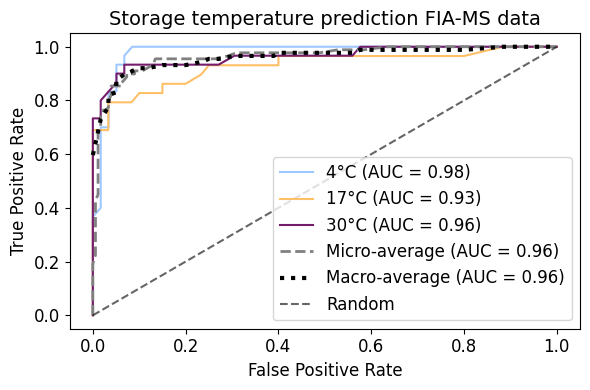

In [25]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
temp_order = np.sort(y.unique())
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
plt.figure(figsize=(6, 4))

# Plot individual ROC curves
for i, temp in enumerate(temp_order):
    plt.plot(fpr[i], tpr[i], label=f'{temp}°C (AUC = {roc_auc[i]:.2f})', color=temp_colors[temp])

# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage temperature prediction FIA-MS data', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250528_just_FIA_tss_ITS_temperature_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [26]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)


In [27]:
metabolome_annotations

,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,mass_diff,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
Column Name,,,,,,,,,,,,,,,,,,,,,
M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00064,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00431,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,0.00066,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#reset index of metabolome_annotations:
metabolome_annotations.reset_index(inplace=True)
metabolome_annotations

,Column Name,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
1,M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
3,M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
4,M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Plot top N
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

,Feature,Importance,Column Name,hmdb_name
0,M937.6324,0.023589,M937.6324,M937.6324
1,M251.0762,0.021178,M251.0762,N-Phenylacetylaspartic acid
2,M328.2215,0.020835,M328.2215,Corchorifatty acid F
3,M147.0438,0.019287,M147.0438,Cinnamic acid
4,M937.4337,0.019064,M937.4337,M937.4337
5,M505.1703,0.016342,M505.1703,M505.1703
6,M207.0864,0.016127,M207.0864,N-Acetyl-L-phenylalanine
7,M937.833,0.014448,M937.833,M937.833
8,M712.4007,0.013837,M712.4007,M712.4007
9,M937.2315,0.011594,M937.2315,M937.2315


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68705/1501754257.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


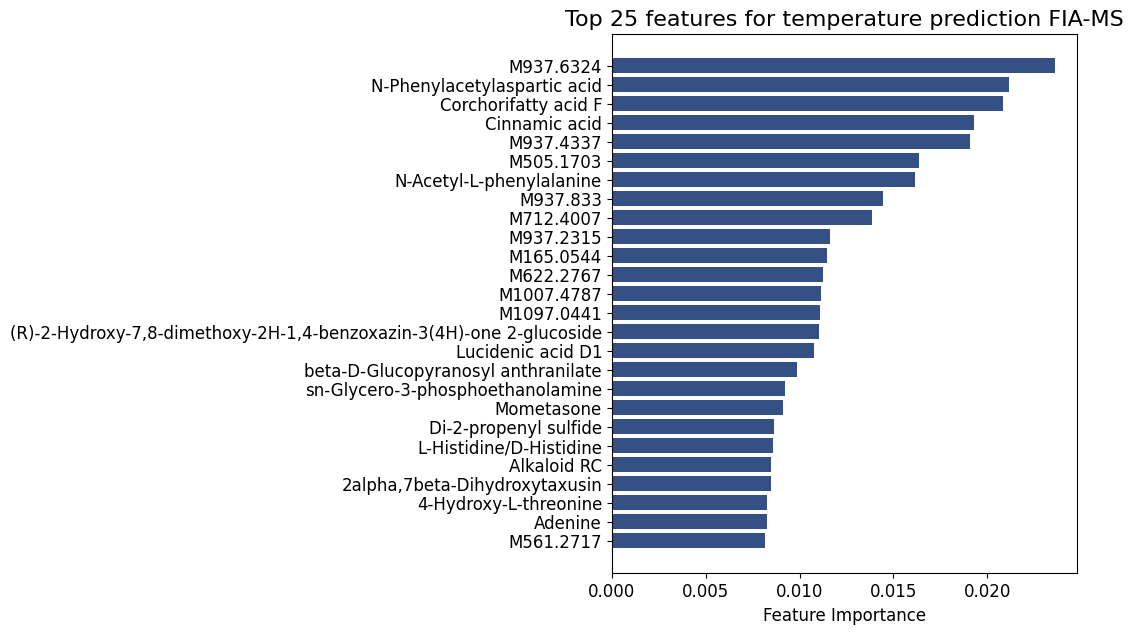

In [30]:
# Plot top N
# top_n = 25
# top_features = importances_df.head(top_n)

plt.figure(figsize=(6, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250528_feature_importances_just_FIA_temperature_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [31]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250528_feature_importances_FIA_temperature_prediction.csv', index=False)

In [55]:
metabolome_annotations

,Column Name,mass,hmdb_accession,hmdb_name,formula,sourdough_class,class,sub_class,super_class,kingdom,...,tie_note,feature,cluster,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Compound_ID_x,Name_x,Chemical.Formula_x
0,M272.1614,272.1614,NaN,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M272.1614,1,272.1619,272.161,0.0009,3.306855,C20279,"(2R,3R)-3-Methylglutamyl-5-semialdehyde-N6-lysine",C12H23N3O4
1,M149.0443,149.0443,HMDB0029398,(3-Nitroamino)alanine,C3H7N3O4,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M134.0459,134.0459,NaN,4-Hydroxy-L-threonine,NaN,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,NaN,...,NaN,M134.0459,1,134.0462,134.046,0.0002,1.492023,"C03059, C06056","2-Hydroxymethylserine, 4-Hydroxy-L-threonine","C4H9NO4, C4H9NO4"
3,M128.0339,128.0339,HMDB0032916,"4-Oxoproline, 5-Oxoproline",C6H8OS,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,6 candidates,M128.0339,1,128.0356,128.034,0.0016,12.496524,"C01877, C01879, C02237, C04281, C04282, C22141","4-Oxoproline, 5-Oxoproline, 5-Oxo-D-proline, L...","C5H7NO3, C5H7NO3, C5H7NO3, C5H7NO3, C5H7N..."
4,M413.1845,413.1845,HMDB0030401,AK toxin I,C23H27NO6,"Amino acids, peptides, and analogues",Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Organic compounds,...,1 candidates,M413.1845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,M487.3036,487.3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,M600.3885,600.3885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,M602.3878,602.3878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M602.3878,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,M650.4282,650.4282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,M650.4282,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#reimport:
imp = pd.read_csv('Stats/20250528_feature_importances_FIA_temperature_prediction.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

,Feature,Importance,Column Name,hmdb_name,sourdough_class,cluster
0,M937.6324,0.023589,M937.6324,M937.6324,NaN,0
1,M251.0762,0.021178,M251.0762,N-Phenylacetylaspartic acid,"Amino acids, peptides, and analogues",2
2,M328.2215,0.020835,M328.2215,Corchorifatty acid F,Fatty acyls,0
3,M147.0438,0.019287,M147.0438,Cinnamic acid,Phenolic compounds,1
4,M937.4337,0.019064,M937.4337,M937.4337,NaN,0
...,...,...,...,...,...,...
855,M467.2261,0.000000,M467.2261,M467.2261,NaN,1
856,M369.1791,0.000000,M369.1791,Trimetrexate,Organoheterocyclic compounds,1
857,M1071.5177,0.000000,M1071.5177,M1071.5177,NaN,0
858,M893.4122,0.000000,M893.4122,M893.4122,NaN,0


In [58]:
top_features = imp.head(25)
top_features

,Feature,Importance,Column Name,hmdb_name,sourdough_class,cluster
0,M937.6324,0.023589,M937.6324,M937.6324,NaN,0
1,M251.0762,0.021178,M251.0762,N-Phenylacetylaspartic acid,"Amino acids, peptides, and analogues",2
2,M328.2215,0.020835,M328.2215,Corchorifatty acid F,Fatty acyls,0
3,M147.0438,0.019287,M147.0438,Cinnamic acid,Phenolic compounds,1
4,M937.4337,0.019064,M937.4337,M937.4337,NaN,0
5,M505.1703,0.016342,M505.1703,M505.1703,NaN,2
6,M207.0864,0.016127,M207.0864,N-Acetyl-L-phenylalanine,"Amino acids, peptides, and analogues",2
7,M937.833,0.014448,M937.833,M937.833,NaN,0
8,M712.4007,0.013837,M712.4007,M712.4007,NaN,0
9,M937.2315,0.011594,M937.2315,M937.2315,NaN,0


In [59]:
cluster_colors = {'0': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '1': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'unknown': '#000000'}

# Example: color by taxonomy or class
color_dict = {
    'Amino acids, peptides, and analogues': '#155f8c',
 'Carbohydrates and carbohydrate conjugates': '#aec7e8',
 'Fatty acyls': '#ffbb78',
 'Glycerolipids': '#98df8a',
 'Glycerophospholipids': '#ff9896',
 'Nucleosides, nucleotides, and analogues': '#c5b0d5',
 'Organic acids and derivatives': '#8c564b',
 'Organoheterocyclic compounds': '#e377c2',
 'Other organic oxygen/nitrogen/sulfur compounds': '#7f7f7f',
 'Phenolic compounds': '#bcbd22',
 'Prenol lipids': '#17becf',
 'Steroids and steroid derivatives': '#9edae5'
    # ... etc.
}

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68705/1143760874.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


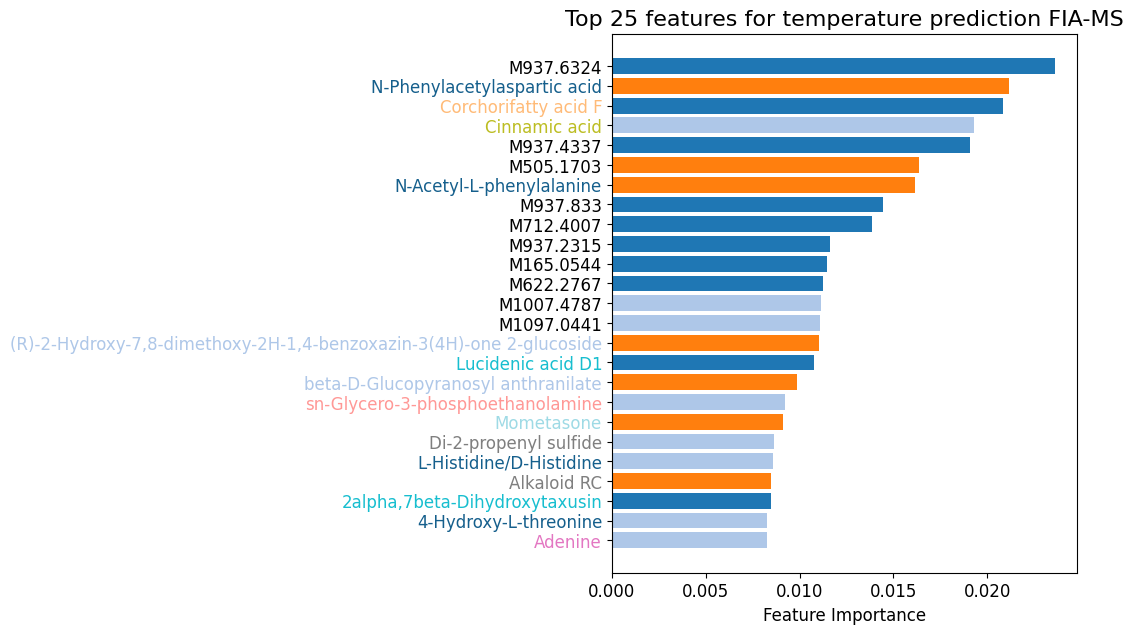

In [63]:
import matplotlib.pyplot as plt
#reimport:
imp = pd.read_csv('Stats/20250528_feature_importances_FIA_temperature_prediction.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

top_features = imp.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(6, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for temperature prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_just_FIA_temperature_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
plt.figure(figsize=(6, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250528_feature_importances_just_FIA_temperature_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68705/3869758882.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys")


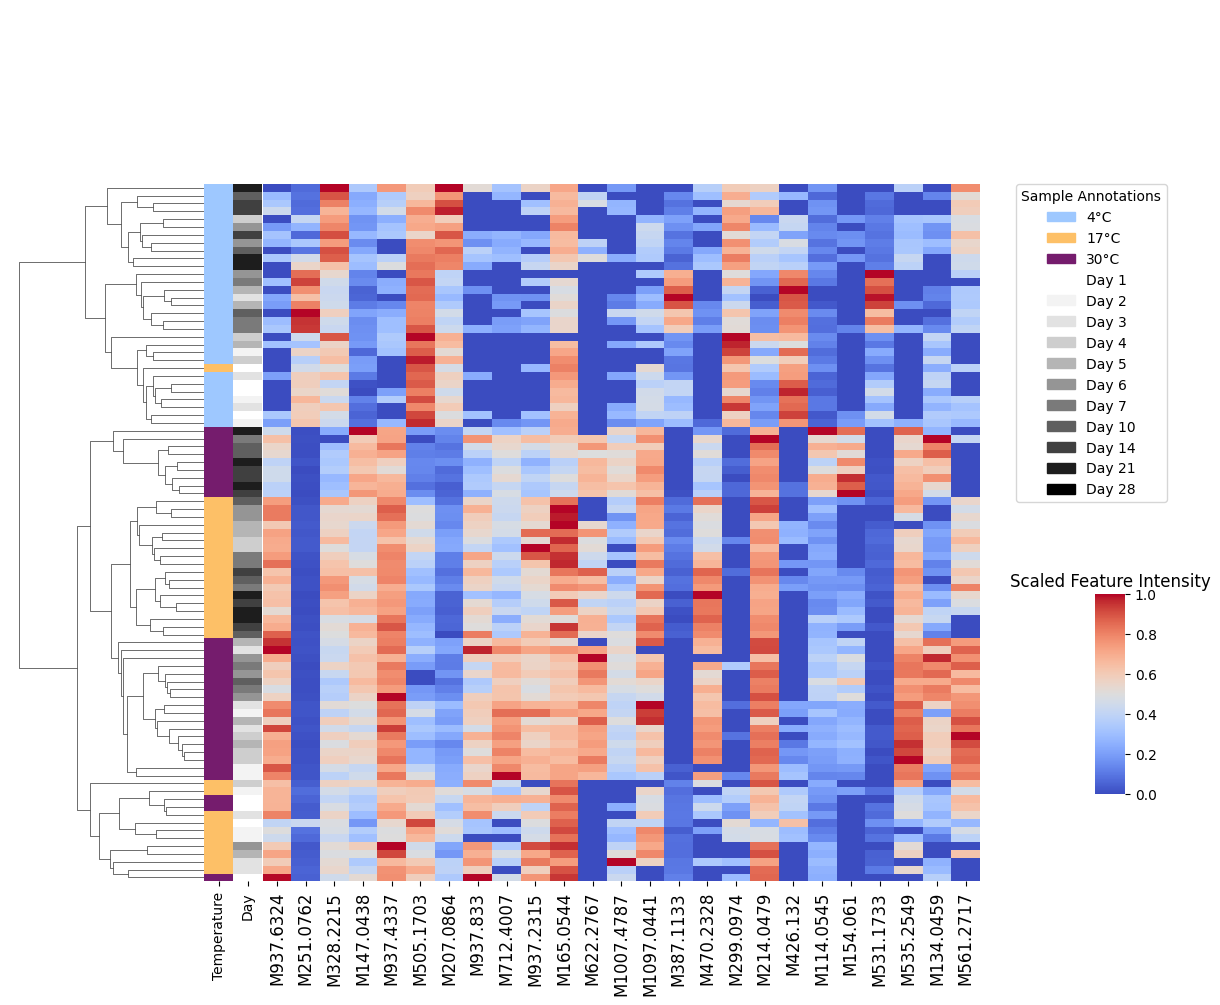

In [32]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
#import package to use cmap:




# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
# top_n = 25
# top_features = importances_df.head(top_n)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# Add metadata
heatmap_df["temperature"] = y
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# Create color mappings
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get 11 evenly spaced colors from white to black using the "Greys" colormap
cmap = cm.get_cmap("Greys")
colors = cmap(np.linspace(0, 1, 11))  # 0 is white, 1 is black

# Example: assign to days if you have 11 unique days
day_values = sorted(meta["day"].unique())[:11]  # ensure max 11 unique days
day_colors = dict(zip(day_values, colors))

# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))

# Row color bar
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# Final heatmap data (drop metadata)
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])

# Plot
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    cmap="coolwarm",
    figsize=(10, 10),
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

# Adjust labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Legends
temp_patches = [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()]
day_patches = [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()]
g.ax_heatmap.legend(
    handles=temp_patches + day_patches,
    title="Sample Annotations",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)

# Optional: save
#g.savefig("feature_expression_heatmap.pdf", dpi=300, bbox_inches='tight')



In [33]:
#import this csv: 20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv

fia_clusters = pd.read_csv('FIA/20250516_fia_feature_table_z_filtered_significant_over_time_long_3clusters_features_per_cluster_annotated.csv', index_col=1)
fia_clusters

,cluster,weight,feature2,Unnamed: 1_x,kegg_mz_x,sample_mz_x,delta_mz_x,ppm_x,Exact.Mass_x,Compound_ID_x,...,Unnamed: 1_y,kegg_mz_y,sample_mz_y,delta_mz_y,ppm_y,Exact.Mass_y,Compound_ID_y,Name_y,Chemical.Formula_y,plusF_y
feature,,,,,,,,,,,,,,,,,,,,,
M272.1614,1,272.161,M272.161,43.0,272.1619,272.161,0.0009,3.306855,273.1689,C20279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M302.0994,0,302.099,M302.099,51.0,302.0997,302.099,0.0007,2.317116,303.1067,C20026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M601.2658,1,601.266,M601.266,78.0,601.2673,601.266,0.0013,2.162100,602.2743,C21433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M134.0459,1,134.046,M134.046,10.0,134.0462,134.046,0.0002,1.492023,135.0532,"C03059, C06056",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M331.2071,0,331.207,M331.207,56.0,331.2082,331.207,0.0012,3.623099,332.2152,"C14488, C15127",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M629.3289,1,629.329,M629.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M615.3079,1,615.308,M615.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M559.2901,1,559.290,M559.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cluster_colors = {'0': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '1': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'unknown': '#000000'}

{'0': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '1': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'unknown': '#000000'}

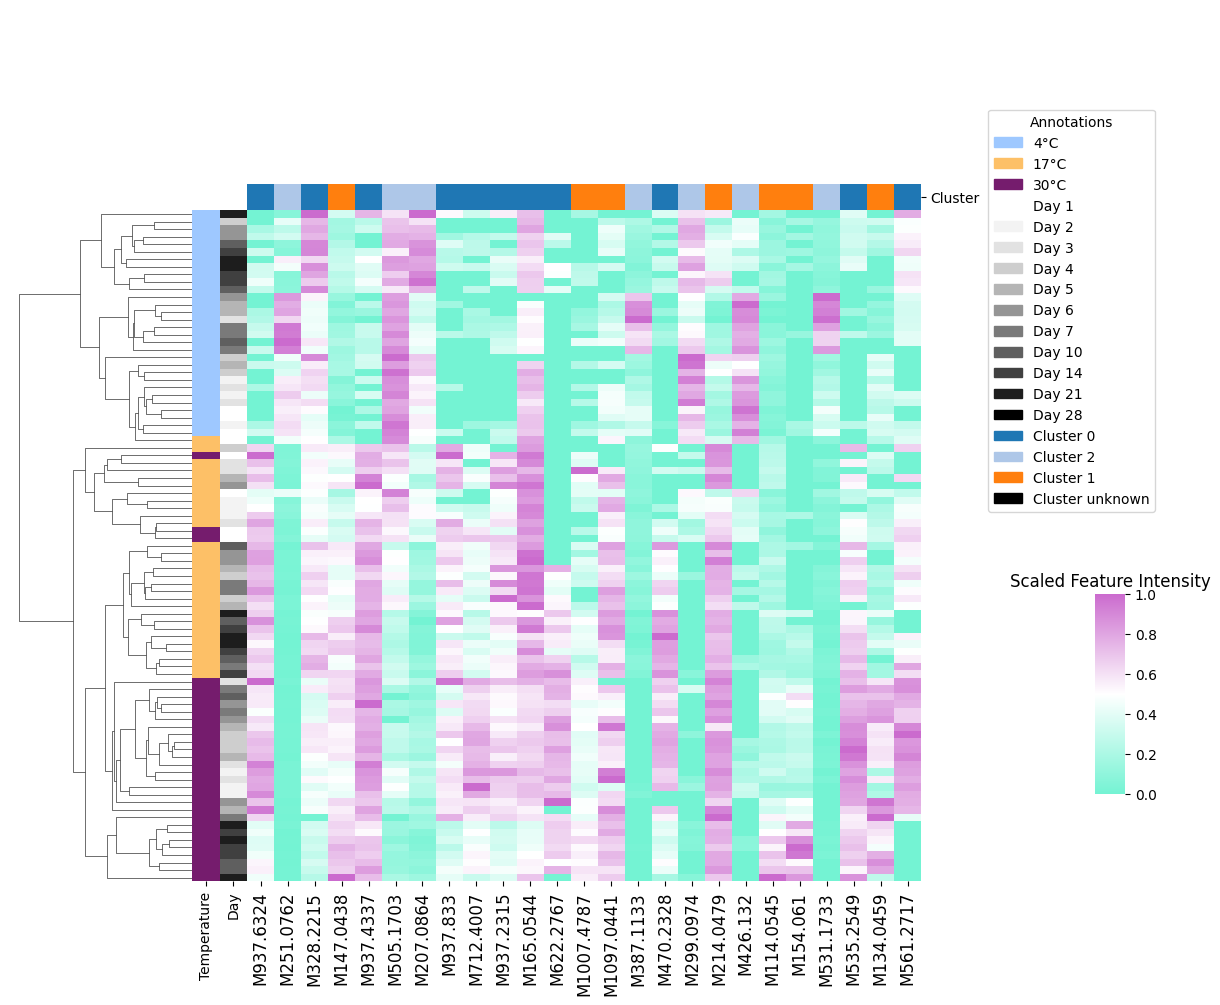

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
#import module for LinearSegmentedColormap:
from matplotlib.colors import LinearSegmentedColormap


# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features


# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering

##################
# Step 1: Create numeric encoding of temp-phase
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)

###################
# Compute distance matrix and hierarchical clustering
# row_dists = pdist(data_for_heatmap.values, metric="euclidean")
# row_linkage = linkage(row_dists, method="average")

# # Apply optimal leaf ordering to the clustering
# row_linkage_ordered = optimal_leaf_ordering(row_linkage, row_dists)
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)
# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250528_feature_expression_heatmap_temperature_prediction_FIA.pdf", dpi=300, bbox_inches='tight')


### alright and now do the same for the days:

In [35]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.pipeline import make_pipeline

# Combine features, prepare labels
#X = pd.concat([bact_aligned_m, fia_aligned], axis=1) can use the same as before, including the transformations
y = meta_aligned["day"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)


<Figure size 800x600 with 0 Axes>

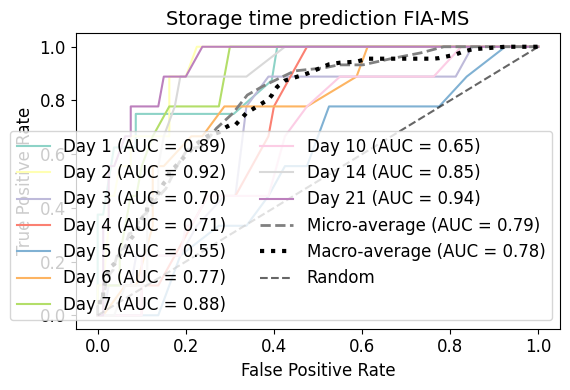

In [37]:


from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# temp_order = np.sort(y.unique())
# temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
# Create color mapping for days (not temperatures)
day_order = np.sort(y.unique())
day_palette = sns.color_palette("Set3", len(day_order))
day_colors = dict(zip(day_order, day_palette))

plt.figure(figsize=(6, 4))

for i, day in enumerate(day_order):
    plt.plot(fpr[i], tpr[i], label=f'Day {day} (AUC = {roc_auc[i]:.2f})', color=day_colors[day])


# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage time prediction FIA-MS', fontsize=14)
plt.legend(loc='lower right', fontsize=12, ncol= 2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250528_just_FIA_tss_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [38]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

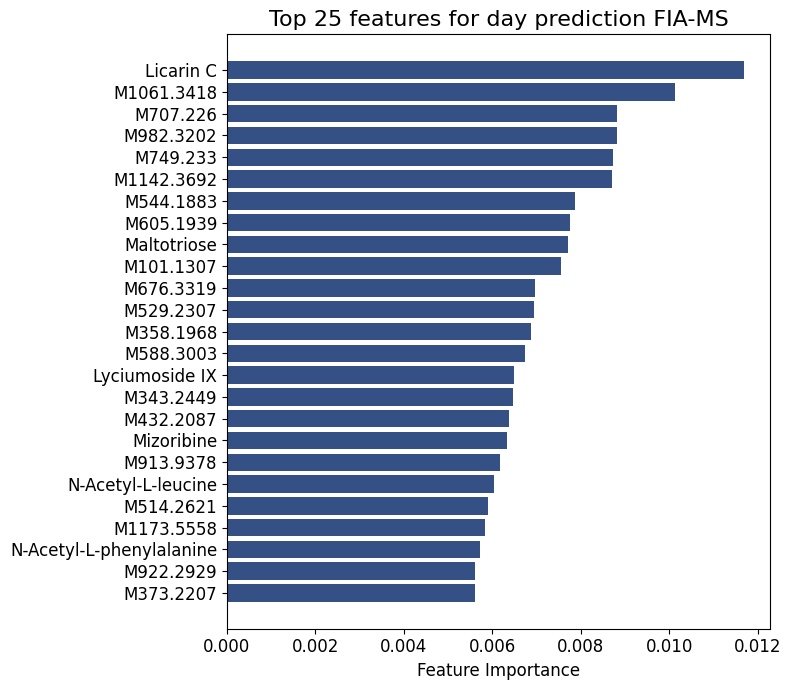

In [39]:
# Plot top N
# top_n = 25
# top_features = importances_df.head(top_n)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

plt.figure(figsize=(8, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250528_feature_importances_day_prediction_FIA.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [40]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250528_feature_importances_day_prediction_FIA.csv', index=False)

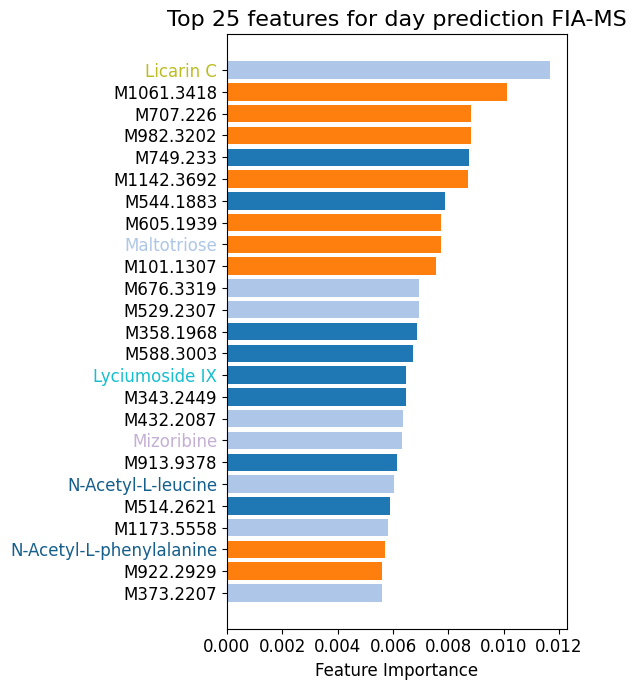

In [65]:
import matplotlib.pyplot as plt
#reimport:
imp = pd.read_csv('Stats/20250528_feature_importances_day_prediction_FIA.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

top_features = imp.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(6, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for day prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_just_FIA_day_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

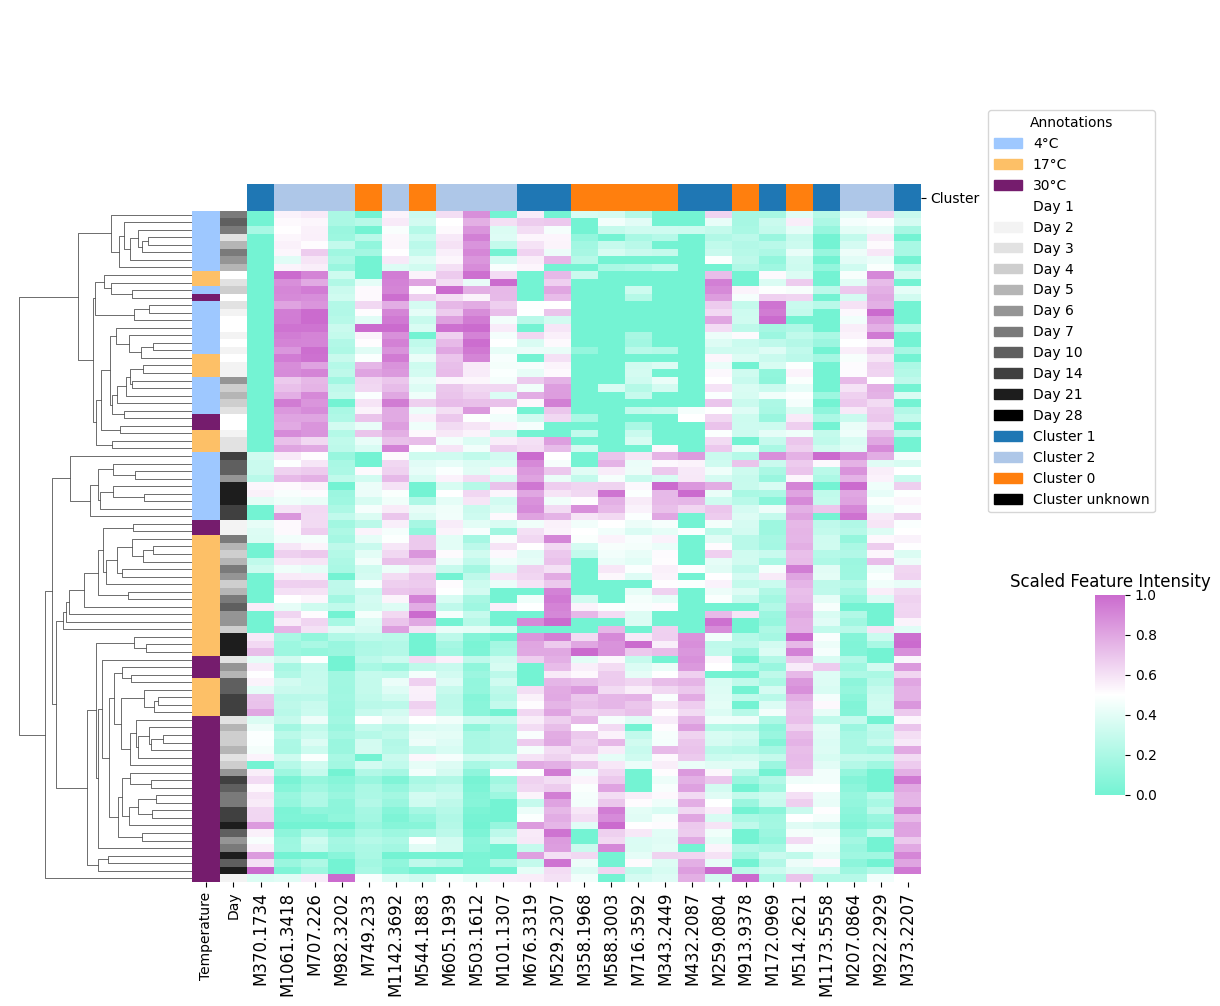

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# --- Add metadata for annotations ---
heatmap_df["temperature"] = meta_aligned.loc[heatmap_df.index, "temperature"]

heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]
# Extract top N features by name
feature_names = top_features["Feature"].values
# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)

# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)


# phase_order = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)


custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)
# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage = row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)
import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250528_feature_expression_heatmap_day_prediction_FIA.pdf", dpi=300, bbox_inches='tight')



### now predict the temp-time period/phase (1,2 or 3) and see whether it gets better than just 'day' or just temperature

In [94]:
meta_aligned.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'phase',
 'phase2',
 'temp-phase',
 'temp-phase2',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpso

In [42]:
#exchange the '.' in the column 'temp-phase' in meta_aligned with '_':
#first make the 'temp-phase' column to string:
meta_aligned['temp-phase2'] = meta_aligned['temp-phase2'].astype(str)
meta_aligned['temp-phase2'] = meta_aligned['temp-phase2'].str.replace('.', '_')


In [43]:
meta_aligned['temp-phase2'].unique()

array(['30_3', '17_1', '30_2', '4_1', '17_2', '17_3', '30_1', '4_2',
       '4_3'], dtype=object)

In [44]:
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.pipeline import make_pipeline

# Combine features, prepare labels
#X = pd.concat([bact_aligned_m, fia_aligned], axis=1)
y = meta_aligned["temp-phase2"]
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_proba_all = []

# Collect predicted probabilities and true labels
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit pipeline
    model = make_pipeline(
        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median'),
        RandomForestClassifier(n_estimators=100, random_state=42)
    )
    model.fit(X_train, y_train)
    
    y_proba = model.predict_proba(X_test)
    y_true_all.extend(y_test.values)
    y_proba_all.append(pd.DataFrame(y_proba, columns=model.named_steps['randomforestclassifier'].classes_, index=X_test.index))

# Concatenate predicted probabilities
y_proba_df = pd.concat(y_proba_all)
y_true_all = pd.Series(y_true_all, index=y_proba_df.index)

<Figure size 800x600 with 0 Axes>

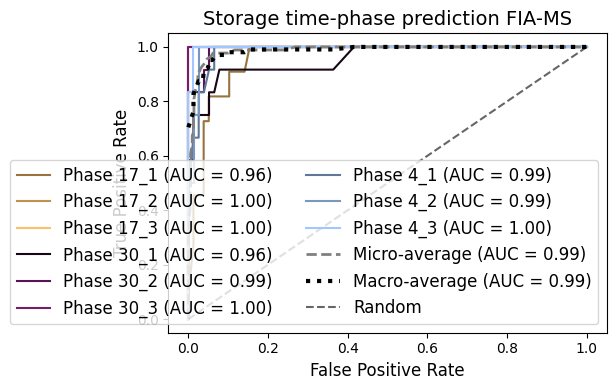

In [45]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true_all, classes=np.sort(y.unique()))
n_classes = y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}

for i, temp in enumerate(np.sort(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_df.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro and micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_df.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(8, 6))
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
temp_order = np.sort(y.unique())
temp_colors = {'4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff", '17_1': "#98733e", '17_2': "#c0924e", 
               '17_3': "#fdc067", '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"}
plt.figure(figsize=(6, 4))

# Plot individual ROC curves
for i, temp in enumerate(temp_order):
    plt.plot(fpr[i], tpr[i], label=f'Phase {temp} (AUC = {roc_auc[i]:.2f})', color=temp_colors[temp])

# Micro-average
plt.plot(fpr["micro"], tpr["micro"],
         label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
         linestyle='--', color='grey', linewidth=2)

# Macro-average
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
         linestyle=':', color='black', linewidth=3)

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random", alpha=0.6)

# Axis and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Storage time-phase prediction FIA-MS', fontsize=14)
plt.legend(loc='lower right', fontsize=12, ncol= 2)
plt.grid(False)
plt.tight_layout()
# Save the figure
plt.savefig('Figures/20250528_just_FIA_tss_temp_time_phase_ROCs.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [46]:
# Final classifier after SelectFromModel
final_clf = model.named_steps['randomforestclassifier']

# Extract selected features
selected_mask = model.named_steps['selectfrommodel'].get_support()
selected_features = X.columns[selected_mask]

# Match importances
importances_df = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

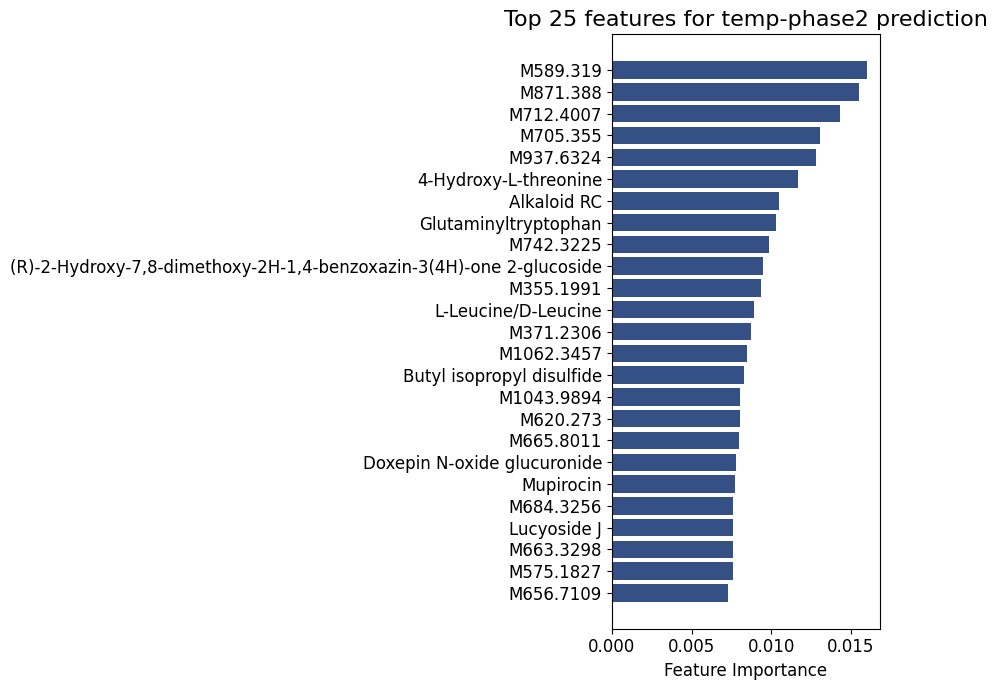

In [48]:
# Plot top N
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

plt.figure(figsize=(9, 7))
plt.barh(top_features['hmdb_name'], top_features['Importance'], color='#345084FF')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for {y.name} prediction', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250528_feature_importances_temperature_phase_prediction_FIA.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [49]:
#also export the feature importances list:
importances_df.to_csv('Stats/20250528_feature_importances_temperature_phase_prediction_FIA.csv', index=False)

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_68705/1271520292.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


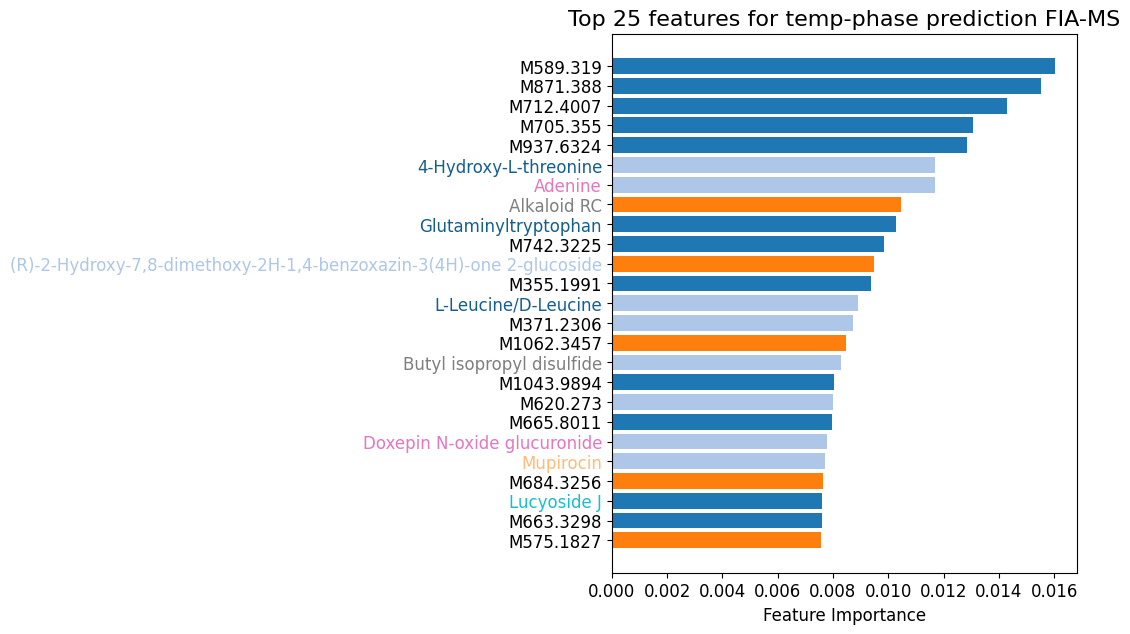

In [67]:
import matplotlib.pyplot as plt
#reimport:
imp = pd.read_csv('Stats/20250528_feature_importances_temperature_phase_prediction_FIA.csv')
imp

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
imp = imp.merge(metabolome_annotations[['Column Name', 'hmdb_name', 'sourdough_class', 'cluster']], left_on='Feature', right_on='Column Name', how='left')
imp

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
imp['hmdb_name'] = imp['hmdb_name'].fillna(imp['Feature'])
imp

top_features = imp.head(25)
top_features

# Map cluster to bar colors and sourdough_class to label colors, with fallback to black for NaNs
bar_colors = top_features['cluster'].astype(str).map(cluster_colors).fillna('#000000')
label_colors = top_features['sourdough_class'].map(color_dict).fillna('#000000')

plt.figure(figsize=(6, 7))
bars = plt.barh(top_features['hmdb_name'], top_features['Importance'], color=bar_colors)

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('', fontsize=14)
plt.yticks(range(len(top_features)), top_features['hmdb_name'], fontsize=12)

# Set the color of each ytick label safely
ax = plt.gca()
for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

plt.xticks(fontsize=12)
plt.title(f'Top {top_n} features for temp-phase prediction FIA-MS', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Figures/20250601_feature_importances_just_FIA_temp_phase_prediction.pdf", dpi=300, bbox_inches="tight")
plt.show()

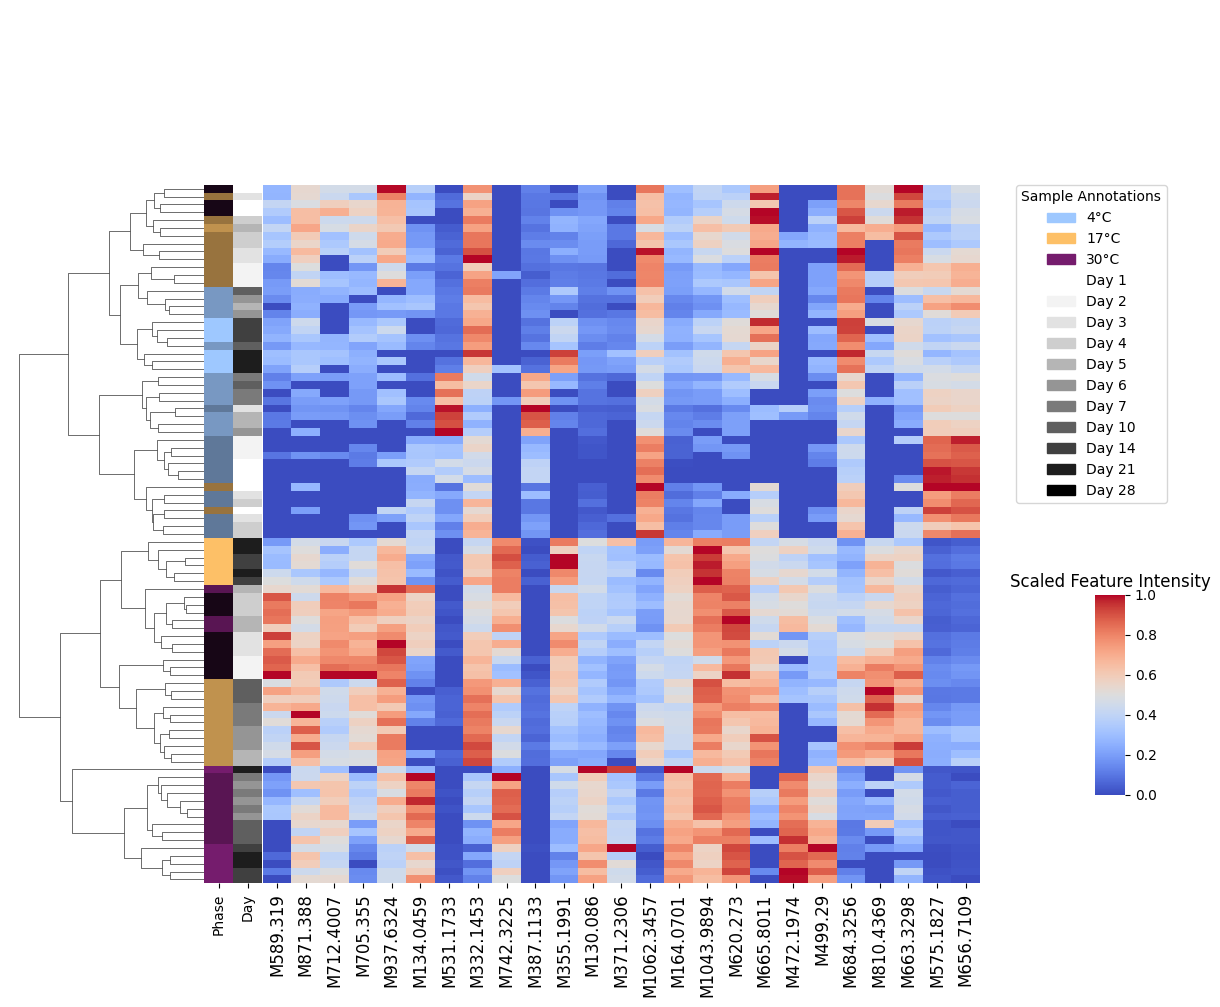

In [50]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# Add metadata
heatmap_df["temperature"] = y
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# Create color mappings
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase2"].map(temp_phase_colors),
    "Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)


# Final heatmap data (drop metadata)
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])

# Plot
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    cmap="coolwarm",
    figsize=(10, 10),
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

# Adjust labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Legends
temp_patches = [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()]
day_patches = [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()]
g.ax_heatmap.legend(
    handles=temp_patches + day_patches,
    title="Sample Annotations",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)

# Optional: save
#g.savefig("feature_expression_heatmap.pdf", dpi=300, bbox_inches='tight')



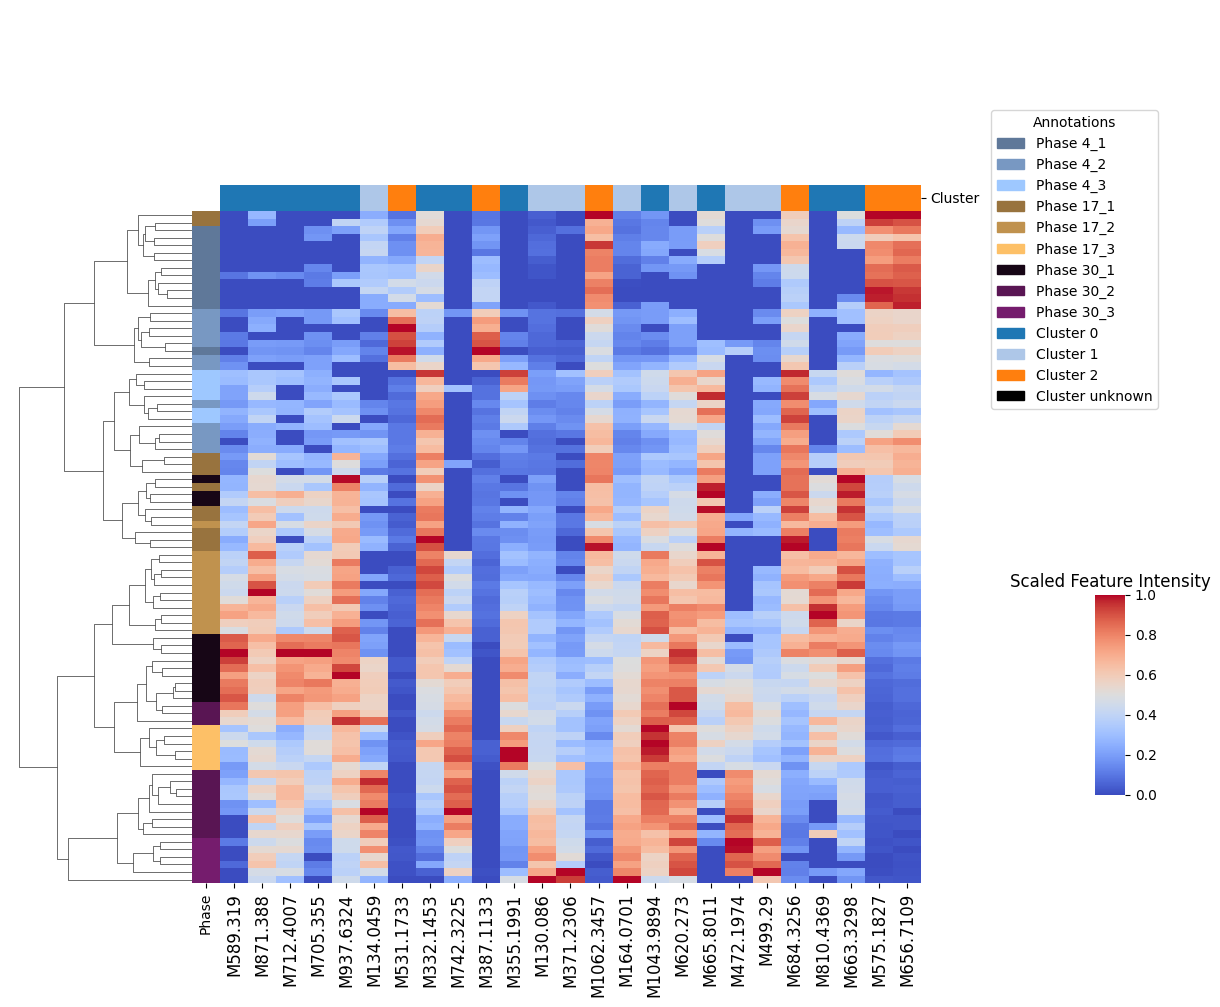

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase2"].map(temp_phase_colors),
    #"Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, optimal_leaf_ordering

# Compute distance matrix and hierarchical clustering
row_dists = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dists, method="average")

# Apply optimal leaf ordering to the clustering
row_linkage_ordered = optimal_leaf_ordering(row_linkage, row_dists)

# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap="coolwarm",
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"Phase {phase}") for phase, color in temp_phase_colors.items()] +
    # [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    # [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
#g.savefig("Figures/20250517_feature_expression_heatmap_temperature_prediction.pdf", dpi=300, bbox_inches='tight')


reorder the leafs:

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Get top N features from final importances
top_n = 25
top_features = importances_df.head(top_n)

# Extract and scale
X_top = X_selected[top_features["Feature"].values]
heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)


# --- Add metadata for annotations ---
heatmap_df["temperature"] = y_true_all.loc[heatmap_df.index]
heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

temp_phase_colors = {
    '4_1': "#5f7899", '4_2': "#7898c2", '4_3': "#9ec8ff",
    '17_1': "#98733e", '17_2': "#c0924e", '17_3': "#fdc067",
    '30_1': "#170616", '30_2': "#591553", '30_3': "#751c6d"
}


# # Row color bar
# row_colors = pd.DataFrame({
#     "Temperature": heatmap_df["temperature"].map(temp_colors),
#     "Day": heatmap_df["day"].map(day_colors)
# }, index=heatmap_df.index)
row_colors = pd.DataFrame({
    "Phase": meta_aligned.loc[heatmap_df.index, "temp-phase"].map(temp_phase_colors),
    #"Day": meta_aligned.loc[heatmap_df.index, "day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]

# Extract top N features by name
feature_names = top_features["Feature"].values

# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)







# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)



from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list, optimal_leaf_ordering
from sklearn.preprocessing import LabelEncoder

# Step 1: Create numeric encoding of temp-phase
phase_order = ['4_1', '4_2', '4_3', '17_1', '17_2', '17_3', '30_1', '30_2', '30_3']
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temp-phase"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)


# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap="coolwarm",
    figsize=(10, 10),
    row_linkage=row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)

import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"Phase {phase}") for phase, color in temp_phase_colors.items()] +
    # [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    # [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
#g.savefig("Figures/20250517_feature_expression_heatmap_phase_temperature_prediction.pdf", dpi=300, bbox_inches='tight')


ValueError: The condensed distance matrix must contain only finite values.

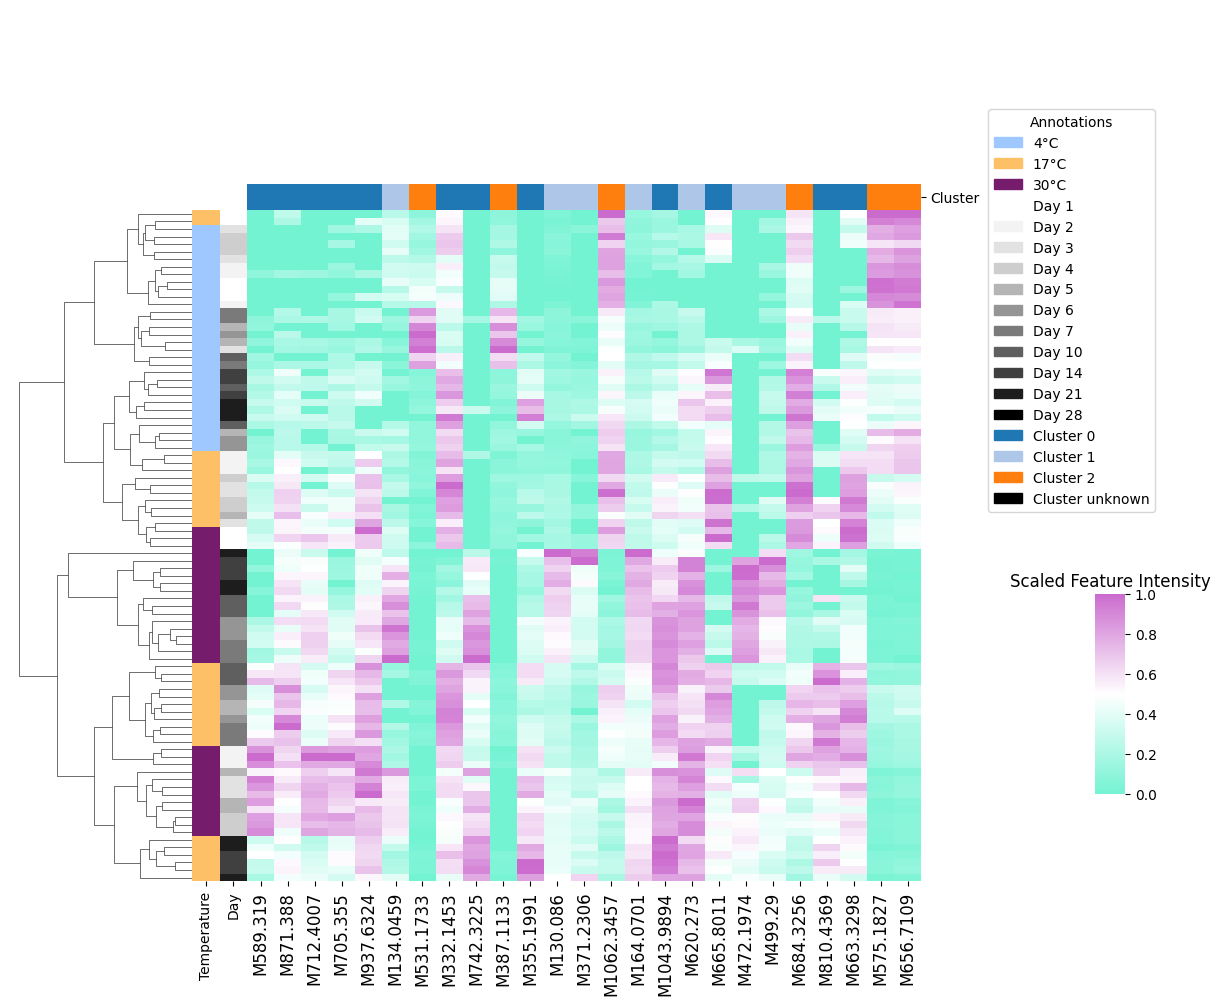

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# # Ensure top_features comes from your final model
# importances = pd.Series(final_clf.feature_importances_, index=X_selected.columns)
top_n = 25
top_features = importances_df.head(top_n)
top_features

#merge the column 'hmdp_name' from metabolome_annotations to top_features via 'Column Name' in metabolome_annotations and 'Feature' in top_features:
top_features = top_features.merge(metabolome_annotations[['Column Name', 'hmdb_name']], left_on='Feature', right_on='Column Name', how='left')
top_features
#drop duplicates:
top_features = top_features.drop_duplicates(subset=['Feature'])

#repalce 'Feature' with 'hmdb_name' in top_features if hmdb_name is not NaN:
top_features['hmdb_name'] = top_features['hmdb_name'].fillna(top_features['Feature'])
top_features

# Normalize top features
#selected_features = X.columns[selected_mask]
X_selected = X[selected_features]  # ← after applying SelectFromModel

X_top = X_selected[top_features["Feature"].values]

heatmap_data = MinMaxScaler().fit_transform(X_top)
heatmap_df = pd.DataFrame(heatmap_data, index=X_top.index, columns=top_features["Feature"].values)

# --- Add metadata for annotations ---
heatmap_df["temperature"] = meta_aligned.loc[heatmap_df.index, "temperature"]

heatmap_df["day"] = meta_aligned.loc[heatmap_df.index, "day"]

# --- Define color maps ---
temp_colors = {4: "#9EC8FF", 17: "#FDC067", 30: "#751C6D"}
#cmap = cm.get_cmap("Set3")
# day_palette = cmap(np.linspace(0, 1, meta_aligned["day"].nunique()))
# day_colors = dict(zip(sorted(meta_aligned["day"].unique()), day_palette))
day_palette = cmap(np.linspace(0, 1, meta["day"].nunique()))
day_colors = dict(zip(sorted(meta["day"].unique()), day_palette))

# --- Row color bar ---
row_colors = pd.DataFrame({
    "Temperature": heatmap_df["temperature"].map(temp_colors),
    "Day": heatmap_df["day"].map(day_colors)
}, index=heatmap_df.index)

# --- Drop metadata for heatmap input ---
data_for_heatmap = heatmap_df.drop(columns=["temperature", "day"])
# Extract cluster info only for selected features
selected_features = top_features["Feature"]
# Extract top N features by name
feature_names = top_features["Feature"].values
# Drop duplicates in FIA cluster table to avoid index clashes
fia_clusters_clean = fia_clusters[~fia_clusters.index.duplicated(keep="first")]

# Map cluster labels to feature names, fallback to "unknown"
feature_clusters = pd.Series("unknown", index=feature_names)
in_fia = pd.Index(feature_names).intersection(fia_clusters_clean.index)
feature_clusters.loc[in_fia] = fia_clusters_clean.loc[in_fia, "cluster"].astype(str)
# Create palette
unique_clusters = feature_clusters.unique()
real_clusters = [c for c in unique_clusters if c != "unknown"]
cluster_palette = sns.color_palette("tab20", n_colors=len(real_clusters))
cluster_colors = dict(zip(real_clusters, cluster_palette))
cluster_colors["unknown"] = "#000000"

# Map colors to cluster assignments
cluster_color_row = feature_clusters.map(cluster_colors)

# Make a DataFrame for column color annotation
col_colors_df = pd.DataFrame([cluster_color_row], index=["Cluster"], columns=feature_names)


# phase_order = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
phase_order = [4, 17, 30]
phase_encoder = {label: i for i, label in enumerate(phase_order)}
phase_vector = meta_aligned.loc[data_for_heatmap.index, "temperature"].map(phase_encoder)

# Step 2: Compute pairwise distances and linkage
row_dist = pdist(data_for_heatmap.values, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

# Step 3: Optimal leaf ordering based on temp-phase distances
# Create an artificial distance matrix from phase order
phase_dist = pdist(phase_vector.values[:, None], metric="euclidean")
row_linkage_ordered = optimal_leaf_ordering(row_linkage, phase_dist)

# Use `row_linkage_ordered` in sns.clustermap as you already do:
# g = sns.clustermap(..., row_linkage=row_linkage_ordered, ...)

custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=500
)

# --- Plot the clustermap ---
g = sns.clustermap(
    data_for_heatmap,
    row_colors=row_colors,
    col_colors=col_colors_df.T,
    cmap=custom_cmap,
    figsize=(10, 10),
    row_linkage = row_linkage_ordered,  # ← KEY LINE
    col_cluster=False,
    yticklabels=False,
    cbar_pos=(1.1, 0.2, 0.03, 0.2)
)
import matplotlib.gridspec as gridspec

# --- After g = sns.clustermap(...) --



# Format axis labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_fontsize(12)
g.cax.set_title("Scaled Feature Intensity", fontsize=12)

# Combine all legend patches in one call
all_patches = (
    [mpatches.Patch(color=color, label=f"{temp}°C") for temp, color in temp_colors.items()] +
    [mpatches.Patch(color=color, label=f"Day {day}") for day, color in day_colors.items()] +
    [mpatches.Patch(color=color, label=f"Cluster {cl}") for cl, color in cluster_colors.items()]
)

# Add single legend
g.ax_heatmap.legend(
    handles=all_patches,
    title="Annotations",
    bbox_to_anchor=(1.1, 1.15),
    loc='upper left',
    borderaxespad=0.,
    fontsize='medium',
    title_fontsize='medium'
)


# Optional: save figure
g.savefig("Figures/20250528_feature_expression_heatmap_phase_day_combined_with_temp_prediction_just_FIA.pdf", dpi=300, bbox_inches='tight')